# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [20]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


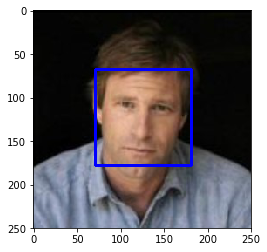

In [21]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [14]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

96% have a detected human face
18% of the dog files have a detected human face

getting human set
getting dog set
counting totals
96 is the percent of correct face classifications
82 is the percent of correct dog classifications
Now printing errors
human set is wrong due to open cv face classification error.


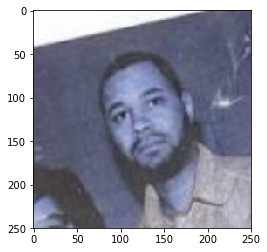

human set is wrong due to open cv face classification error.


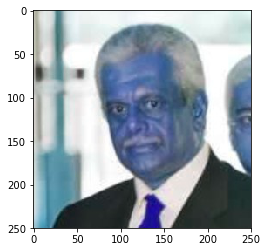

dog set is wrong due to open cv face classification error.


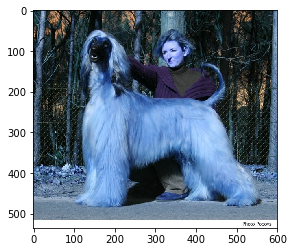

dog set is wrong due to open cv face classification error.


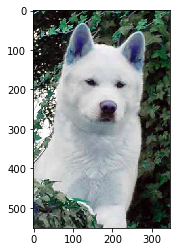

In [4]:
from tqdm import tqdm
import functools as func

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
print('getting human set')
humanset = [(face_detector(i), i) for i in human_files_short]
print('getting dog set')
dogset = [(face_detector(i), i) for i in dog_files_short]
print('counting totals')
hcount = sum(y[0] == True for y in humanset)
dcount = sum(y[0] == False for y in dogset)

print(f'{hcount} is the percent of correct face classifications')
print(f'{dcount} is the percent of correct dog classifications')

#get our dog images with a human face and our human images without a face, sample 2 them
inhuman = list(filter(lambda x: x[0] == False, humanset))
undog = list(filter(lambda x: x[0] == True, dogset))

def SampleImages(images, x, label):
    for i in range(1, x + 1):
        index = i - 1
        file = str(images[index][1])
        print(f'{label} set is wrong due to open cv face classification error.')
        img = cv2.imread(file)
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        
print('Now printing errors')
#now print out a sample of X of the incorrect face classifications
SampleImages(inhuman, 2, 'human')
#now print out a sample of X of the incorrect dog classifications
SampleImages(undog, 2, 'dog')

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [15]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [16]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #load and preprocess the image
    image = Image.open(img_path)
    
    #create our transform
    imageTransform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),transforms.ToTensor()])
    #now create higher dimensional tensor of image
    tensor = imageTransform(image).unsqueeze_(0)
    if use_cuda:
        tensor = tensor.cuda()
    #now evaluate our tensor
    VGG16.eval()
    eval = VGG16(tensor)
    predict = torch.argmax(eval).item()
    #return predicted class
    return predict

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [17]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    lrange = 151
    urange = 268
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return prediction >= lrange and prediction <= urange

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

1. It appears that none of the human files have detected dogs, yay!
2. Unfortunately, it seems like the dog_detector only correctly identifies dogs 96% of the time (false negative of 4%)

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
print('getting human set')
humanset = [(dog_detector(i), i) for i in human_files_short]
print('getting dog set')
dogset = [(dog_detector(i), i) for i in dog_files_short]
print('counting totals')
hcount = sum(y[0] == False for y in humanset)
dcount = sum(y[0] == True for y in dogset)

print(f'{hcount} is the percent of correct human classifications')
print(f'{dcount} is the percent of correct dog classifications')

getting human set
getting dog set
counting totals
100 is the percent of correct human classifications
96 is the percent of correct dog classifications


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
from torchvision import datasets
from torchvision import transforms
import torch
import torchvision.models as models

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
crop_constant = 224
resize_constant = 250
rotation_constant = 15
# a lot of CNN architectures seem to include image normalization as a way of training faster, so we include this in our transforms
normalize_transform = transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
test_transform = transforms.Compose([transforms.Resize(size=resize_constant), transforms.CenterCrop(crop_constant), transforms.ToTensor(), normalize_transform])
validation_transform = transforms.Compose([transforms.Resize(size=resize_constant),transforms.CenterCrop(crop_constant), transforms.ToTensor(), normalize_transform])
train_transform = transforms.Compose([transforms.Resize(size=resize_constant),
                                      transforms.CenterCrop(crop_constant),
                                      transforms.RandomRotation(rotation_constant),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomVerticalFlip(),
                                      transforms.ToTensor(),
                                      normalize_transform])

test_set = datasets.ImageFolder('dogImages/test', transform = test_transform)
validation_set = datasets.ImageFolder('dogImages/valid', transform = validation_transform)
train_set = datasets.ImageFolder('dogImages/train', transform = train_transform)
                                    
train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)
validation_loader = torch.utils.data.DataLoader(validation_set,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=16,
                                          shuffle=False,
                                          num_workers=0)
                                    

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: I decided to pick a 224 x 224 center cropped image as my input tensor because this seemed to tbe default that people were suggesting for a standard VGG19 architecture.


My code does a center crop to pre-process the images to the appropriate size. For the training set, I also add in a random rotation, random horizontal flip, random vertical flip. This is so that there will be a random re-orientation of the image with p 0.5 on horizontal and vertical flilp and a slight rotation of the image based off of the arbitrarily chosen costant of 15 degrees.

I decided to augment the dataset in this way so that the deep neural network would have more randomness in its data set and hopefully be less likely to overfit this training data.

Finally, I added in a normalization step because I read that this was useful for training conv. nets.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [2]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    ###We're picking a modified VGG 19 
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        ## 20% chance of dropout when training
        self.number_classes = 133
        self.dropout_constant = 0.3
        #five convolutional layers like in VGG 19
        self.c1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        #self.c12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        #convolutional layer 2
        self.c2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        #self.c22 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        #layer 3
        self.c3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        #self.c32 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        #layer 4
        self.c4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        #self.c42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        #Layer 5
        self.c5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        #self.c52 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        ## now define max pooling layer
        self.max_pool = nn.MaxPool2d(2, 2)
        ## now define fully connected layers corresponding to image classes
        self.fc1 = nn.Linear(7 * 512 * 7, 1280)
        self.fc2 = nn.Linear(1280, self.number_classes)
        #self.fc3 = nn.Linear(256, self.number_classes)
        self.dropout = nn.Dropout(self.dropout_constant)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.c1(x))
        ##x = F.relu(self.c12(x))
        x = self.max_pool(x)
        x = F.relu(self.c2(x))
        ##x = F.relu(self.c22(x))
        x = self.max_pool(x)
        x = F.relu(self.c3(x))
        #x = F.relu(self.c32(x))
        
        #We exclude most of the layers (all but one) in each convolutional set in order to avoid running out of memory with CUDA
        #x = F.relu(self.c32(x))
        #x = F.relu(self.c32(x))
        x = self.max_pool(x)
        x = F.relu(self.c4(x))
        #x = F.relu(self.c42(x))
        #x = F.relu(self.c42(x))
        #x = F.relu(self.c42(x))
        x = self.max_pool(x)
        x = F.relu(self.c5(x))
        #x = F.relu(self.c52(x))
        #x = F.relu(self.c52(x))
        #x = F.relu(self.c52(x))
        x = self.max_pool(x)
        #now we transition to the fully connected layers
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
I decided to take from the VGG19 architecture in order to train this neural net. I understand this may have been overkill for a 10% accuracy, but I wanted to try one of the more complicated convolutional neural net architectures on the from-scratch portion to see how long it would take to train.

The architecture is pretty simple - multiple convolutional layers followed by max pooling layers, culminating in a fully connected layer with dimensionality of 7 x 7 x 512. (512 is the final convolutional layer, we have 2 ^ 5 max pooling layers on an initial image size of 224 x 224, which gives us 7 x 7 fo this piece).

Of course, one thing I simplified from the VGG19 architecture is taking out some of the convolutional layers, this is so that the model could actually train on my machine without running out of memory...

After all this, we have two fully connected layers. Normally it would be three, but due to memory constraints (and strangely, the model trained better with two, I bumped it down to two layers) I modified these to reduce to a final class score of 133 since this is the number of classes we need to classify.

The only other piece I added was a dropout layer for each fully connected layer to evenly train all parts of the MLP. This helped avoid overtraining.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [4]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [4]:
import numpy as np
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #zero out the gradient
            optimizer.zero_grad()
            
            #forward pass and calculate loss
            forward = model(data)
            loss = criterion(forward, target)
            loss.backward()
            
            #perform optimization
            optimizer.step()
            
            #finally, lets update the training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                forward = model(data)
            loss = criterion(forward, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print(f'Validation loss is less than minimum. Saving model. Loss is: {valid_loss}')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

loaders_scratch = {'train' : train_loader,
                   'valid' : validation_loader,
                   'test'  : test_loader}

# train the model
model_scratch = train(22, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.888856 	Validation Loss: 4.876798
Validation loss is less than minimum. Saving model. Loss is: 4.876798152923584
Epoch: 2 	Training Loss: 4.801261 	Validation Loss: 4.634686
Validation loss is less than minimum. Saving model. Loss is: 4.634686470031738
Epoch: 3 	Training Loss: 4.630630 	Validation Loss: 4.592887
Validation loss is less than minimum. Saving model. Loss is: 4.5928874015808105
Epoch: 4 	Training Loss: 4.543777 	Validation Loss: 4.546154
Validation loss is less than minimum. Saving model. Loss is: 4.546154022216797
Epoch: 5 	Training Loss: 4.425051 	Validation Loss: 4.367168
Validation loss is less than minimum. Saving model. Loss is: 4.367167949676514
Epoch: 6 	Training Loss: 4.258107 	Validation Loss: 4.331445
Validation loss is less than minimum. Saving model. Loss is: 4.33144474029541
Epoch: 7 	Training Loss: 4.126431 	Validation Loss: 4.414213
Epoch: 8 	Training Loss: 4.025639 	Validation Loss: 4.245623
Validation loss is less than minimum. 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [5]:
import numpy as np
def test(loaders, model, criterion, use_cuda):

    #empty cuda cache so that we can run this without out of memory exceptions
    torch.cuda.empty_cache()
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
print('assigning loaders')
#load loaders scratch
loaders_scratch = {'train' : train_loader,
                   'valid' : validation_loader,
                   'test'  : test_loader}
print('loading model from model_scratch.pt')
#load model from model_scratch.pt
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
print('testing model')
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

assigning loaders
loading model from model_scratch.pt
testing model
Test Loss: 3.636297


Test Accuracy: 15% (127/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [6]:
## TODO: Specify data loaders

import os
from torchvision import datasets
from torchvision import transforms
import torch
import torchvision.models as models

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
crop_constant = 224
resize_constant = 250
rotation_constant = 15
# a lot of CNN architectures seem to include image normalization as a way of training faster, so we include this in our transforms
normalize_transform = transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
test_transform = transforms.Compose([transforms.Resize(size=resize_constant), transforms.CenterCrop(crop_constant), transforms.ToTensor(), normalize_transform])
validation_transform = transforms.Compose([transforms.Resize(size=resize_constant),transforms.CenterCrop(crop_constant), transforms.ToTensor(), normalize_transform])
train_transform = transforms.Compose([transforms.Resize(size=resize_constant),
                                      transforms.CenterCrop(crop_constant),
                                      transforms.RandomRotation(rotation_constant),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomVerticalFlip(),
                                      transforms.ToTensor(),
                                      normalize_transform])

test_set = datasets.ImageFolder('dogImages/test', transform = test_transform)
validation_set = datasets.ImageFolder('dogImages/valid', transform = validation_transform)
train_set = datasets.ImageFolder('dogImages/train', transform = train_transform)
                                    
train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)
validation_loader = torch.utils.data.DataLoader(validation_set,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=16,
                                          shuffle=False,
                                          num_workers=0)
                                    


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import torchvision.models as models
import torch.nn as nn

dropout_constant = 0.3

## TODO: Specify model architecture 
use_cuda = torch.cuda.is_available()
#download VGG19 pretrained model
model_transfer = models.vgg19(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False

#now define the fully connected part of the network architecture
final_model = nn.Sequential(nn.Linear(512 * 7 * 7, 1280), 
                            nn.ReLU(), 
                            nn.Dropout(dropout_constant),
                            nn.Linear(1280, len(train_set.classes)))
#replace our transfer model classifier with our new classifier
model_transfer.classifier = final_model


if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ :

I have assumed that because most of the classification of a convolutional neural net architecture like VGG19 is based off of generalizations of shapes, colors, etc. that most of the pre-training used to train VGG19 will be useful in creating a dog classifier.

Because of this, I use all of the parts of the pre-existing VGG19 architecture, the only difference being replacing the classifier portion of that model with my own.

The classifier portion was modeled after my own modified convolutional neural network architecture, with an input of 512 * 7 * 7, connected to a final layer with an output of 133.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [8]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [9]:
## Redefine test and train (copied from above) so that we can execute these without re-training our scratch network

import numpy as np
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #zero out the gradient
            optimizer.zero_grad()
            
            #forward pass and calculate loss
            forward = model(data)
            loss = criterion(forward, target)
            loss.backward()
            
            #perform optimization
            optimizer.step()
            
            #finally, lets update the training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                forward = model(data)
            loss = criterion(forward, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print(f'Validation loss is less than minimum. Saving model. Loss is: {valid_loss}')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

def test(loaders, model, criterion, use_cuda):

    #empty cuda cache so that we can run this without out of memory exceptions
    torch.cuda.empty_cache()
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [10]:
n_epochs = 12
# train the model

loaders_transfer = {'train' : train_loader,
                   'valid' : validation_loader,
                   'test'  : test_loader}
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.537674 	Validation Loss: 1.365908
Validation loss is less than minimum. Saving model. Loss is: 1.3659080266952515
Epoch: 2 	Training Loss: 2.038936 	Validation Loss: 1.007456
Validation loss is less than minimum. Saving model. Loss is: 1.007455587387085
Epoch: 3 	Training Loss: 1.721311 	Validation Loss: 0.999470
Validation loss is less than minimum. Saving model. Loss is: 0.9994704127311707
Epoch: 4 	Training Loss: 1.534819 	Validation Loss: 0.973711
Validation loss is less than minimum. Saving model. Loss is: 0.9737105965614319
Epoch: 5 	Training Loss: 1.447860 	Validation Loss: 0.879416
Validation loss is less than minimum. Saving model. Loss is: 0.8794160485267639
Epoch: 6 	Training Loss: 1.359028 	Validation Loss: 0.869575
Validation loss is less than minimum. Saving model. Loss is: 0.8695746660232544
Epoch: 7 	Training Loss: 1.274063 	Validation Loss: 0.913896
Epoch: 8 	Training Loss: 1.190633 	Validation Loss: 0.826648
Validation loss is less than mini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [11]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.974146


Test Accuracy: 71% (596/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [12]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_set.classes]

#First, re-load our state transfer network for use to predict the dog breed
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)
    
    #Transform our image similarly to how we transformed them with data loaders in our previous step...
    image_transforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224), transforms.ToTensor()])
    
    tensor_data = image_transforms(image)
    #now unqueeze the data
    tensor_data = tensor_data.unsqueeze_(0)
    
    if use_cuda:
        tensor_data = tensor_data.cuda()
    
    #now evaluate using our convolutional network...
    with torch.no_grad():
        output = model_transfer(tensor_data)
        class_result = torch.argmax(output).item()
    return class_names[class_result]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [24]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    #use face detector for human, even though we know its far from perfect
    is_human = face_detector(img_path)
    is_dog = dog_detector(img_path)
    image = Image.open(img_path)
    if is_dog:
        print('Dog detected!')
        plt.imshow(image)
        plt.show()
        breed = predict_breed_transfer(img_path)
        print(f'Dog breed is a .... {breed}')
    else:
        print('Human detected!')
        plt.imshow(image)
        plt.show()
        breed = predict_breed_transfer(img_path)
        print(f'You look like a .... {breed}')
    #else:
        #plt.imshow(image)
        #plt.show()
        #print(f'Sorry, this image is neither human nor dog')
        
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1. I would say the output is worse than I expected. For one, the face detector does not seem to work as well as I'd like it to, so I would probably transfer-learn train a different neural network with better accuracy or pick a better network than the CV2 face detector that we used.

2. At first glance, I thought that the dog classifier was pretty off... I did a google image search and picked a doberman pinscher, pitbull, and dachshund, and only the dacshund was classified correctly. However, it seems that the misclassified breeds are VERY close to the ones I picked in appearance. I might add more MLP layers and data transforms to try and get a lower validation set error on my data... As well as perhaps including more training data that distinguishes between these breeds.

3. Another improvement to the algorithm could be made by substituting VGG19 with a more modern deep learning architecture, like inception. 

Human detected!


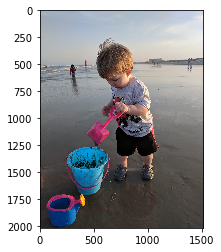

You look like a .... Bichon frise
Human detected!


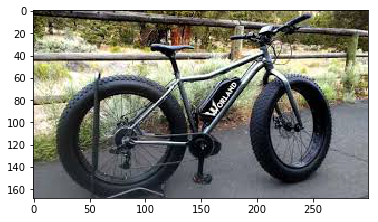

You look like a .... Irish water spaniel
Human detected!


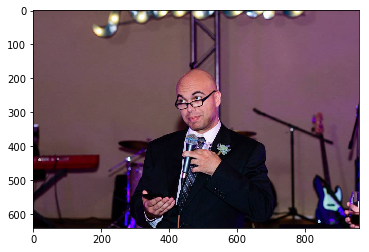

You look like a .... Poodle
Dog detected!


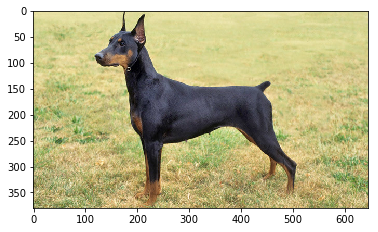

Dog breed is a .... Manchester terrier
Dog detected!


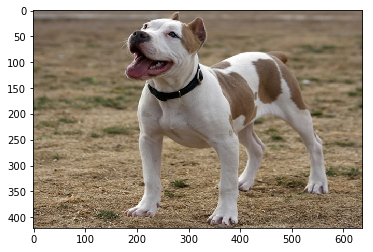

Dog breed is a .... American staffordshire terrier
Dog detected!


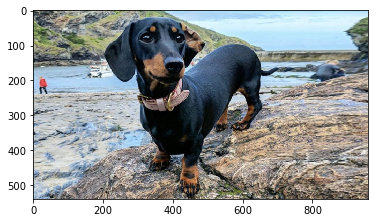

Dog breed is a .... German pinscher
Human detected!


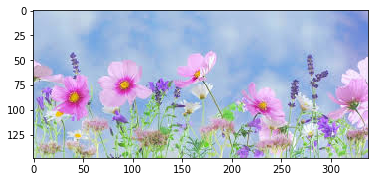

You look like a .... Lowchen
Human detected!


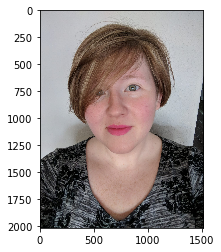

You look like a .... Maltese
Human detected!


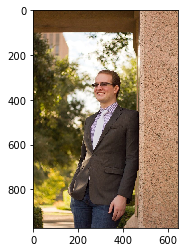

You look like a .... Poodle
Human detected!


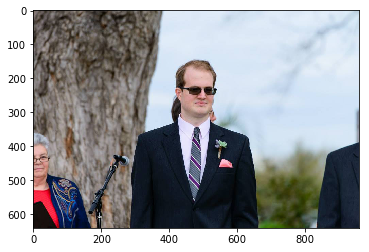

You look like a .... Poodle


In [25]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import cv2                
import matplotlib.pyplot as plt   
import numpy as np
from glob import glob
my_files = np.array(glob("customImages/*"))
## suggested code, below
for file in my_files:
    run_app(file)